# Construction Planning

In [ ]:
import pandas as pd
import numpy as np
import sklearn
design = pd.read_csv("Early_Design.csv")
pavement = pd.read_csv("Pavement_Moratoriums.csv")
unit = pd.read_csv("Resident_Units.csv")
street = pd.read_csv("Seattle_Streets.csv")

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pav = pavement.groupby("BLOCK_DESCR").count().reset_index()[["BLOCK_DESCR","OBJECTID"]]
pav.columns = ["UNITDESC","COUNT"]
st_pav = street.merge(pav, on="UNITDESC",how="left").fillna(0)
st_pav['TRACT'] = pd.read_csv('TRACT.csv')['0'].values
street_pivot = st_pav[['TRACT', 'STREETTYPE','OBJECTID']].groupby(['TRACT', 'STREETTYPE']).count().reset_index().pivot(index='TRACT',columns="STREETTYPE",values='OBJECTID').fillna(0)
st_pav_df = pd.DataFrame()
st_pav_df["TRACT"] = st_pav.groupby(['TRACT']).count().reset_index()['TRACT'].values
st_pav_df["STREET"] = st_pav.groupby(['TRACT'])['OBJECTID'].count().values
st_pav_df["ST_PAVEMENT"] = st_pav.groupby(['TRACT'])['COUNT'].sum().values
st_pav_df["ST_DOWNTOWN"] = (street_pivot['Downtown'] + street_pivot['Downtown Neighborhood'] + street_pivot['Downtown Neighborhood Access']).values
st_pav_df["ST_INDUSTRIAL"] = (street_pivot['Industrial Access'] + street_pivot['Minor Industrial Access']).values
st_pav_df["ST_NEIGHBORHOOD"] = (street_pivot['Neighborhood Corridor'] + street_pivot['Neighborhood Yield Street']).values
st_pav_df["ST_URBAN"] = (street_pivot['Urban Center Connector'] + street_pivot['Urban Village Main'] + street_pivot['Urban Village Neighborhood'] + street_pivot['Urban Village Neighborhood Access']).values

unit["TRACT"] = unit["TRACT"].values.astype(int)
un_des_df = unit[unit['YEAR']==20152019].merge(design[design['YEAR']==20152019], on="TRACT", how="outer").fillna(0)[["TRACT", "HU_ADD", "HU_NET", "EDG"]]

data = st_pav_df.merge(un_des_df, on="TRACT", how="outer").fillna(0)

In [ ]:
data.to_csv("st_pav.csv")

In [ ]:
pd.read_csv('psrc_trips.csv')

In [ ]:
import pandas as pd
import numpy as np
street = pd.read_csv("Street_Address___st_address_line.csv")
cross = pd.read_excel("ZIP_TRACT_122023.xlsx")
street["ZIP"] = street["ZIP_L"].fillna(0).astype(str)
cross["ZIP"] = cross["ZIP"].astype(str)
result = street.merge(cross, on="ZIP")
#result['TRACT'] = result['TRACT'].astype(int).values/100
housing = pd.read_csv("housing.csv")
data = result.groupby('TRACT')['ST_NAME'].nunique().reset_index()
housing['TRACT'] = housing['GEO_ID_TRT']
housing['number'] = housing['E00002002']
housing['density'] = housing['E00002002']*1e7/housing['Shape_Area']

<ipython-input-33-d493f0c02ea0>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  street = pd.read_csv("Street_Address___st_address_line.csv")


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import pyproj
pav = pd.read_csv("pavement.csv")
census_tracts = gpd.read_file('kc_tract_10.shp')
crs_wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 coordinate system
crs_tract = census_tracts.crs  # Coordinate system of the census tract shapefile
projector = pyproj.Transformer.from_crs(crs_wgs84, crs_tract, always_xy=True)

# Load the census tract shapefile

CT = []
# Example latitude and longitude pair
for idx, data in pav.iterrows():
  if idx%100==0:
        print(idx)

  lat, lon = data["X"], data["Y"]

  projected_longitude, projected_latitude = projector.transform(lat, lon)

  point = Point(projected_longitude, projected_latitude)

# Check which census tract contains the point
  for index, tract in census_tracts.iterrows():

      if tract.geometry.contains(point):
          CT.append(tract['NAME10'])
          break
  else:
      CT.append("0")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
pav['CT'] = CT
pav.groupby('CT')['OBJECTID'].nunique().reset_index().to_csv("pav.csv")
housing[['TRACT','number','density']].to_csv("construction.csv")

In [ ]:
housing

,OBJECTID,GEO_ID_TRT,TRACT_LBL,Shape_Length,Shape_Area,E00002002
0,1,53033000100,Tract 000100,23925.247095,3.440312e+07,200
1,2,53033000200,Tract 000200,24111.645835,3.537106e+07,200
2,3,53033000300,Tract 000300,17267.970371,1.302887e+07,100
3,4,53033000401,Tract 000401,15767.297460,1.467846e+07,200
4,5,53033000402,Tract 000402,21397.174887,1.936217e+07,150
...,...,...,...,...,...,...
393,394,53033032702,Tract 032702,588019.039030,5.646742e+09,150
394,395,53033032703,Tract 032703,79531.062571,1.117866e+08,100
395,396,53033032704,Tract 032704,113088.821283,1.895472e+08,150
396,397,53033032800,Tract 032800,704550.242960,1.525832e+10,250


In [ ]:
pav = pd.read_csv("pavement.csv")
pav["FULLNAME"] = pav["RouteName"]
result_pav = result.merge(pav, on="FULLNAME", how="left")
result_pav

,OBJECTID_x,FRADDL,FRADDR,TOADDL,TOADDR,FULLNAME,DIRPREFIX,ST_NAME,ST_TYPE,DIRSUFFIX,...,Color,SqFt,RefReading,RefReadDate,InstallDate,LegacyID,DBModDate,DBCreateDate,ModifiedBy,ActiveDate
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,2010/02/03 02:00:00+00,10020300500,2019/04/02 11:21:17+00,2012/04/18 11:15:00+00,bondjo,2010/02/03 02:00:00+00
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,2010/02/03 02:00:00+00,10020300400,2019/04/02 11:22:30+00,2012/04/18 11:15:00+00,bondjo,2010/02/03 02:00:00+00
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,2010/02/03 01:00:00+00,10020300100,2019/04/02 11:14:29+00,2012/04/18 11:15:00+00,bondjo,2010/02/03 01:00:00+00
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,2010/02/03 02:00:00+00,10020300200,2019/04/02 11:17:22+00,2012/04/18 11:15:00+00,bondjo,2010/02/03 02:00:00+00
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,2000/02/23 01:00:00+00,00022339100,2016/07/25 10:54:04+00,2012/04/18 11:15:00+00,bondjo,2000/02/23 01:00:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897547,53340,12550.0,12551.0,12598.0,12599.0,NE 205TH ST,NE,205TH,ST,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897548,53340,12550.0,12551.0,12598.0,12599.0,NE 205TH ST,NE,205TH,ST,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897549,53340,12550.0,12551.0,12598.0,12599.0,NE 205TH ST,NE,205TH,ST,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897550,53340,12550.0,12551.0,12598.0,12599.0,NE 205TH ST,NE,205TH,ST,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,TRACT,ST_NAME
0,00101,192
1,00102,192
2,00201,192
3,00202,192
4,00300,206
...,...,...
520,70315,197
521,70316,197
522,70703,17
523,73301,239


# Social Demographic

In [7]:
import pandas as pd
import numpy as np
trip = pd.read_csv("psrc_trips.csv")
trips = trip.merge(pd.read_csv("psrc_hh.csv")[["household_id","final_home_tract10"]], on="household_id")
trips['weight'] = np.sum(trips[['trip_adult_weight_2021', 'trip_respondent_weight_2021',
       'trip_weight_2017', 'trip_weight_2019', 'trip_weight_2017_2019',
       'trip_adult_weight_2017_2019']].fillna(0).values,axis=1)
trips_same = trips[trips["o_tract10"]==trips["d_tract10"]]
trips_cross = trips[trips["o_tract10"]!=trips["d_tract10"]]

<ipython-input-7-b856da34f121>:3: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv("psrc_trips.csv")
<ipython-input-7-b856da34f121>:4: DtypeWarning: Columns (28,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = trip.merge(pd.read_csv("psrc_hh.csv")[["household_id","final_home_tract10"]], on="household_id")


In [12]:
data = trips_same[["vehicle_count","hhincome_broad","car_share","numadults","numchildren","age_category","gender","employment","education","license",'main_mode','weight']].fillna('Unknown').replace("Missing: Skip Logic", "Unknown").replace("Prefer not to answer", "Unknown").replace("Not listed here / prefer not to answer", "Unknown")
data['TRACT'] = trips_same['o_tract10'].fillna(0).astype(int)
gtfs = pd.read_csv("gtfs.csv",index_col=0)
pav = pd.read_csv("pav.csv",index_col=0)
street = pd.read_csv("street.csv",index_col=0)
con = pd.read_csv("construction.csv",index_col=0)
cluster = pd.read_csv("clustering.csv",index_col=0)
x = data.merge(con, on="TRACT", how='left').merge(pav, on="TRACT", how='left').merge(street, on="TRACT", how='left').merge(gtfs, on="TRACT", how='left').merge(cluster, on="TRACT", how='left')
x_mean = x.groupby('Cluster')['number','density','pav','street','route_id','trip_id','stop_id','weekday','weekend'].mean().reset_index()
x[['number','density','pav','street','route_id','trip_id','stop_id','weekday','weekend']] = x[['number','density','pav','street','route_id','trip_id','stop_id','weekday','weekend']].fillna(x[['number','density','pav','street','route_id','trip_id','stop_id','weekday','weekend']].mean())
x[["vehicle_count","hhincome_broad","car_share","numadults","numchildren","age_category","gender","employment","education","license",'number','density','pav','street','route_id','trip_id','stop_id','weekday','weekend']].to_csv("inter_x.csv")
x[['main_mode','weight']].to_csv("inter_y.csv")
x_mean.to_csv("inter_cluster.csv")

<ipython-input-12-4689014e60de>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x_mean = x.groupby('Cluster')['number','density','pav','street','route_id','trip_id','stop_id','weekday','weekend'].mean().reset_index()


In [19]:
import geopandas as gpd

# Load the shapefile containing the census tract boundaries
census_tracts = gpd.read_file('kc_tract_10.shp')

# Calculate centroids
centroids = census_tracts.centroid

# Add centroid coordinates as new columns
census_tracts['centroid_x'] = centroids.x
census_tracts['centroid_y'] = centroids.y
# Display the first few rows of the resulting dataframe
cent = census_tracts[['GEOID10', 'centroid_x', 'centroid_y']]
cent.to_csv("cross_centroid.csv")

In [14]:
data = trips_cross[["vehicle_count","hhincome_broad","car_share","numadults","numchildren","age_category","gender","employment","education","license",'main_mode','weight','o_tract10','d_tract10']].dropna().fillna('Unknown').replace("Missing: Skip Logic", "Unknown").replace("Prefer not to answer", "Unknown").replace("Not listed here / prefer not to answer", "Unknown")
data[['main_mode','weight']].to_csv("outer_y.csv")

,vehicle_count,hhincome_broad,car_share,numadults,numchildren,age_category,gender,employment,education,license,main_mode,weight,o_tract10,d_tract10
0,1 vehicle,"$200,000 or more",Yes,2,0,18-64 years,Male,"Employed full time (35+ hours/week, paid)",Bachelor degree,"Yes, has an intermediate or unrestricted license",HOV,957.849541,5.303300e+10,5.303301e+10
1,1 vehicle,"$200,000 or more",Yes,2,0,18-64 years,Male,"Employed full time (35+ hours/week, paid)",Bachelor degree,"Yes, has an intermediate or unrestricted license",SOV,957.849541,5.303301e+10,5.303300e+10
4,1 vehicle,"$200,000 or more",Yes,2,0,18-64 years,Male,"Employed full time (35+ hours/week, paid)",Bachelor degree,"Yes, has an intermediate or unrestricted license",SOV,957.849541,5.303300e+10,5.303301e+10
5,1 vehicle,"$200,000 or more",Yes,2,0,18-64 years,Male,"Employed full time (35+ hours/week, paid)",Bachelor degree,"Yes, has an intermediate or unrestricted license",HOV,957.849541,5.303301e+10,5.303300e+10
8,1 vehicle,"$200,000 or more",Yes,2,0,18-64 years,Female,"Employed full time (35+ hours/week, paid)",Bachelor degree,"Yes, has an intermediate or unrestricted license",HOV,1715.243042,5.303300e+10,5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136074,2 vehicles,"$100,000 or more",No,2,1,Under 18 years,Female,Unknown,Unknown,Unknown,HOV,18.336137,5.306105e+10,5.306105e+10
136075,2 vehicles,"$100,000 or more",No,2,1,Under 18 years,Female,Unknown,Unknown,Unknown,HOV,18.336137,5.306105e+10,5.303302e+10
136076,2 vehicles,"$100,000 or more",No,2,1,Under 18 years,Female,Unknown,Unknown,Unknown,HOV,18.336137,5.303302e+10,5.306105e+10
136077,2 vehicles,"$100,000 or more",No,2,1,Under 18 years,Female,Unknown,Unknown,Unknown,HOV,0.000000,5.306105e+10,5.303302e+10


In [38]:
cent['GEOID10']=cent['GEOID10'].astype(float)
distance = data[['o_tract10','d_tract10']]
distance['GEOID10'] = data['o_tract10'].astype(float)
distance = distance.merge(cent,on="GEOID10",how='left')
distance = distance[['centroid_x','centroid_y']]
distance.columns=['o_x','o_y']
distance['GEOID10'] = data['d_tract10'].astype(float)
distance = distance.merge(cent,on="GEOID10",how='left')
distance['distance'] = np.sqrt((distance['o_x'].values-distance['centroid_x'].values)**2+(distance['o_y'].values-distance['centroid_y'].values)**2)
distance

<ipython-input-38-90bffb7d0ae4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cent['GEOID10']=cent['GEOID10'].astype(float)
<ipython-input-38-90bffb7d0ae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance['GEOID10'] = data['o_tract10'].astype(float)


,o_x,o_y,GEOID10,centroid_x,centroid_y,distance
0,1.260337e+06,246660.248446,5.303301e+10,1.270782e+06,213859.990858,34423.125463
1,1.270782e+06,213859.990858,5.303300e+10,1.260337e+06,246660.248446,34423.125463
2,1.260337e+06,246660.248446,NaN,NaN,NaN,NaN
3,1.270782e+06,213859.990858,NaN,NaN,NaN,NaN
4,1.260337e+06,246660.248446,5.303301e+10,1.270782e+06,213859.990858,34423.125463
...,...,...,...,...,...,...
96838,NaN,NaN,5.303302e+10,1.263671e+06,274729.652781,NaN
96839,NaN,NaN,5.303300e+10,1.271396e+06,270068.834153,NaN
96840,1.290069e+06,282931.453391,5.303300e+10,1.271528e+06,254138.551941,34245.894064
96841,NaN,NaN,5.303300e+10,1.271396e+06,270068.834153,NaN


In [41]:
data['distance']=distance['distance']
data = data.dropna()
data[["vehicle_count","hhincome_broad","car_share","numadults","numchildren","age_category","gender","employment","education","license",'distance']].to_csv("outer_x.csv")
data[['main_mode','weight']].to_csv("outer_y.csv")

In [3]:
original_x = trips.groupby("person_dim_id").first()[["final_home_tract10","vehicle_count","hhincome_broad","car_share","numadults","numchildren","age_category","gender","employment","education","license"]].reset_index().fillna(0)
trips["weight"] = trips["trip_adult_weight_2021"].fillna(0).values + trips["trip_adult_weight_2017_2019"].fillna(0).values
original_y = trips.groupby(["person_dim_id","main_mode"]).sum()["weight"].reset_index().pivot(index="person_dim_id",columns="main_mode",values="weight").fillna(0).reset_index()
original_y

<ipython-input-3-b5067e38aea0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  original_y = trips.groupby(["person_dim_id","main_mode"]).sum()["weight"].reset_index().pivot(index="person_dim_id",columns="main_mode",values="weight").fillna(0).reset_index()


main_mode,person_dim_id,Bike,HOV,Other,SOV,Transit,Walk
0,1710000501,0.000000,67.586524,0.0,39.434320,0.000000,0.000000
1,1710000502,0.000000,67.586524,0.0,0.000000,0.000000,0.000000
2,1710002401,25.090692,0.000000,0.0,35.145895,0.000000,60.236587
3,1710002402,0.000000,17.572947,0.0,17.572947,12.545346,12.545346
4,1710002403,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
14107,19201839701,0.000000,170.103056,0.0,0.000000,0.000000,170.103056
14108,19201839702,0.000000,170.103056,0.0,121.436756,0.000000,0.000000
14109,19201842501,0.000000,42.784321,0.0,0.000000,0.000000,0.000000
14110,19201842502,0.000000,12.224092,0.0,67.232504,0.000000,12.224092


In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

def encode_and_pca(df, columns):
    for column in columns:
      try:
    # Perform one-hot encoding
        df[column] = df[column].replace(0, '0')
        one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
        one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
        print(one_hot_encoded)

        # Perform PCA
        pca_result = pca.fit_transform(one_hot_encoded)

        # Add the PCA result as a new column
        df[column] = pca_result
      except:
        continue
    return df

# Apply one-hot encoding followed by PCA
df_encoded = encode_and_pca(original_x, original_x.columns[2:])

print(df_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[1. 0.]
 [0. 0.]
 [0. 1.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [26]:
X = df_encoded.iloc[:,2:]
Y = original_y.iloc[:,1:]
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is your predictor data with 19 columns and Y is your target data with 6 columns
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize PLSR model with desired number of components
n_components = 10  # Example, you can choose the appropriate number of components based on cross-validation
plsr_model = PLSRegression(n_components=n_components)

# Fit the PLSR model
plsr_model.fit(X_train, Y_train)

# Predictions on the test set
Y_pred = plsr_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for each output
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')

# Print MSE for each output
for i, mse_value in enumerate(mse):
    print(f"Mean Squared Error for Output {i+1}: {mse_value}")

# You can also evaluate other metrics based on your specific problem requirements


Mean Squared Error for Output 1: 26015.610717512463
Mean Squared Error for Output 2: 7193926.992884073
Mean Squared Error for Output 3: 69725.70304173864
Mean Squared Error for Output 4: 13263595.47466293
Mean Squared Error for Output 5: 573088.0493583877
Mean Squared Error for Output 6: 1778492.7187537306


In [28]:
Y_pred

array([[  26.88101386,  337.03825078,   29.35412345, 1582.89729601,
         142.59096737,  289.4159461 ],
       [  21.05074245,  772.12941629,   17.44002392,  916.80643125,
          31.96283039,  304.54842744],
       [  16.63273397,  582.59630522,   18.71300051, 1207.09751152,
          66.70511171,  264.49033882],
       ...,
       [  33.7758748 ,  262.45223512,   36.83597038, 1730.24730219,
         150.7389984 ,  291.71376111],
       [  40.9806584 ,  890.27136625,   19.79187148, 1532.30061949,
          47.7955344 ,  261.48787988],
       [  23.58055372, 1524.37553017,   -4.25178963, 1050.19930157,
         -55.48661441,  240.06497922]])

In [ ]:
df_encoded.to_csv("encoded_x_social.csv")

# GTFS Data

In [ ]:
import pandas as pd
import numpy as np
calendar = pd.read_csv("calendar.txt")
stop_times = pd.read_csv("stop_times.txt")
stops = pd.read_csv("stops.txt")
trips = pd.read_csv("trips.txt")

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import pyproj
stops = pd.read_csv("stops.txt")
census_tracts = gpd.read_file('kc_tract_10.shp')
crs_wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 coordinate system
crs_tract = census_tracts.crs  # Coordinate system of the census tract shapefile
projector = pyproj.Transformer.from_crs(crs_wgs84, crs_tract, always_xy=True)

# Load the census tract shapefile

CT = []
# Example latitude and longitude pair
for idx, data in stops.iterrows():

  lat, lon = data["stop_lat"], data["stop_lon"]

  projected_longitude, projected_latitude = projector.transform(lon, lat)

  point = Point(projected_longitude, projected_latitude)

# Check which census tract contains the point
  for index, tract in census_tracts.iterrows():
      if tract.geometry.contains(point):
          CT.append(tract['NAME10'])
          break
  else:
      CT.append("0")

In [ ]:
stops['TRACT'] = CT

In [ ]:
trips.merge(calendar, on="service_id").merge(stop_times, on="trip_id").merge(stops, on="stop_id").to_csv("gtfs_synth.csv")

In [ ]:
import pandas as pd
import numpy as np
gtfs = pd.read_csv("gtfs_synth.csv",index_col=0)
gtfs.columns

<ipython-input-6-eacfe9857fa7>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  gtfs = pd.read_csv("gtfs_synth.csv",index_col=0)


Index(['route_id', 'service_id', 'trip_id', 'trip_headsign', 'trip_short_name',
       'direction_id', 'block_id', 'shape_id', 'peak_flag', 'fare_id',
       'wheelchair_accessible', 'bikes_allowed', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date',
       'end_date', 'arrival_time', 'departure_time', 'stop_id',
       'stop_sequence', 'stop_headsign', 'pickup_type', 'drop_off_type',
       'shape_dist_traveled', 'timepoint', 'stop_code', 'stop_name',
       'stop_desc', 'stop_lat', 'stop_lon', 'zone_id', 'stop_url',
       'location_type', 'parent_station', 'stop_timezone',
       'wheelchair_boarding', 'TRACT'],
      dtype='object')

In [ ]:
gtfs_data = gtfs.groupby("TRACT")["route_id","trip_id","stop_id"].nunique().reset_index()
gtfs_cal = gtfs[["TRACT","trip_id",'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].drop_duplicates().groupby("TRACT")['monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday'].sum().reset_index()[["monday","saturday"]]
gtfs_data["weekday"] = gtfs_cal["monday"].values
gtfs_data["weekend"] = gtfs_cal["saturday"].values

<ipython-input-7-51a38751ee9b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gtfs_data = gtfs.groupby("TRACT")["route_id","trip_id","stop_id"].nunique().reset_index()
<ipython-input-7-51a38751ee9b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gtfs_cal = gtfs[["TRACT","trip_id",'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].drop_duplicates().groupby("TRACT")['monday', 'tuesday', 'wednesday', 'thursday', 'friday',


In [ ]:
st_pav = pd.read_csv("st_pav.csv",index_col=0)
st_pav['TRACT'] = st_pav['TRACT'].values/100
tract_data = st_pav.merge(gtfs_data, on="TRACT", how="outer").fillna(0)

In [ ]:
tract_data

,TRACT,STREET,ST_PAVEMENT,ST_DOWNTOWN,ST_INDUSTRIAL,ST_NEIGHBORHOOD,ST_URBAN,HU_ADD,HU_NET,EDG,route_id,trip_id,stop_id,weekday,weekend
0,1.00,123.0,6.0,0.0,0.0,95.0,24.0,271.0,265.0,11.0,7,1492,17,584,458
1,2.00,264.0,0.0,0.0,0.0,218.0,44.0,101.0,88.0,2.0,8,1185,30,493,345
2,3.00,161.0,3.0,0.0,0.0,116.0,38.0,54.0,50.0,4.0,9,207,8,81,56
3,4.01,99.0,4.0,0.0,0.0,58.0,39.0,202.0,191.0,7.0,4,836,19,355,249
4,4.02,165.0,2.0,0.0,0.0,140.0,22.0,205.0,195.0,2.0,4,741,16,314,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,326.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,35,8,35,0
369,326.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,50,22,36,14
370,327.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,66,11,52,14
371,327.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,66,12,52,14


In [ ]:
tract_data.to_csv("tract_construction.csv")

# Y

In [ ]:
import pandas as pd
import numpy as np
person = pd.read_csv("psrc_person.csv")
household = pd.read_csv("psrc_hh.csv")
df = household.merge(person,on='household_id')[["person_id","final_home_tract10"]]
df["final_home_tract10"] = df['final_home_tract10'].astype(str)
result = df[df['final_home_tract10'].str.startswith('53033')]
result['tract'] = result['final_home_tract10'].str[-5:]
result['TRACT'] = result['tract'].astype(int).values/100
result['person_dim_id'] = result['person_id']
tract_belonging = result[["person_dim_id","TRACT"]]

<ipython-input-1-7d913cc22100>:3: DtypeWarning: Columns (1,3,7,23,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,77,78,81,84,85,95,96,97,98,99,100,101,102,103,104,105,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,135,136,137,138,139,140,141,142,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  person = pd.read_csv("psrc_person.csv")
<ipython-input-1-7d913cc22100>:4: DtypeWarning: Columns (28,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  household = pd.read_csv("psrc_hh.csv")
<ipython-input-1-7d913cc22100>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['tract'] = result['final_home_tract10'].str[-5:]
<ipython-input-1-7d913cc22100>:9

In [ ]:
soc = pd.read_csv("encoded_x_social.csv",index_col=0)
#con = pd.read_csv("tract_construction.csv", index_col=0)
x = soc.merge(tract_belonging, on="person_dim_id")
x

,person_dim_id,final_home_tract10,vehicle_count,hhincome_broad,car_share,numadults,numchildren,age_category,gender,employment,education,license,TRACT
0,1710000501,53033032323,0.027964,-0.254267,0.473921,0.339439,-0.007382,-0.042744,0.010742,0.476079,0.719114,-0.204121,323.23
1,1710000502,53033032323,0.027964,-0.254267,-0.233247,0.339439,-0.007382,-0.042744,0.717624,0.712687,0.128855,-0.204121,323.23
2,1710002401,53033007600,0.027964,-0.507170,1.180967,-0.412775,0.719509,-0.042721,0.010803,0.519042,0.719114,-0.204121,76.00
3,1710002402,53033007600,-0.688904,-0.254267,1.180967,-0.412775,0.719509,-0.042721,-0.696589,-0.529925,0.719114,-0.204121,76.00
4,1710002403,53033007600,-0.688904,-0.254267,1.180967,-0.412775,0.719509,-0.621931,0.010740,0.384983,0.084334,0.673001,76.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,19201834401,53033007300,-0.688904,0.672124,-0.233247,-0.412775,-0.007378,0.772457,0.717624,0.712687,0.719114,-0.204121,73.00
10277,19201834402,53033007300,-0.688904,0.672124,-0.233247,-0.412775,-0.007378,0.772457,-0.696589,0.439563,-0.686075,-0.204121,73.00
10278,19201837201,53033002900,0.027959,-0.479366,1.180967,-0.412775,-0.007378,-0.042721,-0.696589,0.476079,-0.686075,-0.204121,29.00
10279,19201839001,53033022803,0.725116,-0.507170,-0.233247,-0.412775,0.719509,-0.042721,0.717624,-0.529925,0.128855,-0.204121,228.03


In [ ]:
trips = pd.read_csv("psrc_trips.csv")
trips.groupby("person_dim_id")["trip_id"].nunique().reset_index()

<ipython-input-5-2c34363561e0>:1: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("psrc_trips.csv")


,person_dim_id,trip_id
0,1710000501,5
1,1710000502,3
2,1710002401,8
3,1710002402,4
4,1710002403,2
...,...,...
14107,19201839701,4
14108,19201839702,4
14109,19201842501,16
14110,19201842502,27


In [ ]:
trips['weight'] = np.sum(trips[['trip_adult_weight_2021', 'trip_respondent_weight_2021',
       'trip_weight_2017', 'trip_weight_2019', 'trip_weight_2017_2019',
       'trip_adult_weight_2017_2019']].fillna(0).values,axis=1)
y = trips.groupby("person_dim_id")["trip_id"].nunique().reset_index()
y['weight'] = trips.groupby("person_dim_id")["weight"].first().reset_index()['weight'].values

In [ ]:
x.merge(y, on="person_dim_id").drop(columns="TRACT").to_csv("first_phase.c")

,person_dim_id,final_home_tract10,vehicle_count,hhincome_broad,car_share,numadults,numchildren,age_category,gender,employment,education,license,trip_id,weight
0,1710000501,53033032323,0.027964,-0.254267,0.473921,0.339439,-0.007382,-0.042744,0.010742,0.476079,0.719114,-0.204121,5,78.868640
1,1710000502,53033032323,0.027964,-0.254267,-0.233247,0.339439,-0.007382,-0.042744,0.717624,0.712687,0.128855,-0.204121,3,78.868640
2,1710002401,53033007600,0.027964,-0.507170,1.180967,-0.412775,0.719509,-0.042721,0.010803,0.519042,0.719114,-0.204121,8,50.181385
3,1710002402,53033007600,-0.688904,-0.254267,1.180967,-0.412775,0.719509,-0.042721,-0.696589,-0.529925,0.719114,-0.204121,4,70.291790
4,1710002403,53033007600,-0.688904,-0.254267,1.180967,-0.412775,0.719509,-0.621931,0.010740,0.384983,0.084334,0.673001,2,37.636039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,19201834401,53033007300,-0.688904,0.672124,-0.233247,-0.412775,-0.007378,0.772457,0.717624,0.712687,0.719114,-0.204121,6,28.866877
10277,19201834402,53033007300,-0.688904,0.672124,-0.233247,-0.412775,-0.007378,0.772457,-0.696589,0.439563,-0.686075,-0.204121,4,28.866877
10278,19201837201,53033002900,0.027959,-0.479366,1.180967,-0.412775,-0.007378,-0.042721,-0.696589,0.476079,-0.686075,-0.204121,5,737.046804
10279,19201839001,53033022803,0.725116,-0.507170,-0.233247,-0.412775,0.719509,-0.042721,0.717624,-0.529925,0.128855,-0.204121,2,2281.663824


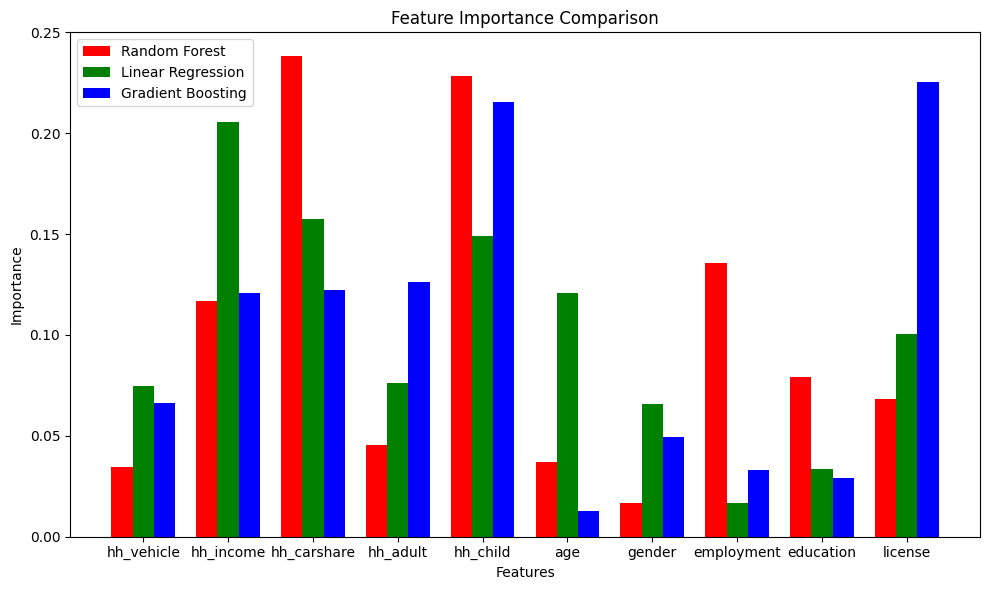

In [ ]:
import matplotlib.pyplot as plt

# Define feature importances for each model
rf_feature_importance = {
    'hh_vehicle': 0.0347,
    'hh_income': 0.1167,
    'hh_carshare': 0.2381,
    'hh_adult': 0.0453,
    'hh_child': 0.2282,
    'age': 0.0371,
    'gender': 0.0167,
    'employment': 0.1357,
    'education': 0.0791,
    'license': 0.0684
}

lr_feature_importance = {
    'Feature 1': 0.0746,
    'Feature 2': 0.2057,
    'Feature 3': 0.1574,
    'Feature 4': 0.0762,
    'Feature 5': 0.1491,
    'Feature 6': 0.1206,
    'Feature 7': 0.0658,
    'Feature 8': 0.0168,
    'Feature 9': 0.0336,
    'Feature 10': 0.1003
}

gb_feature_importance = {
    'Feature 1': 0.0660,
    'Feature 2': 0.1207,
    'Feature 3': 0.1223,
    'Feature 4': 0.1262,
    'Feature 5': 0.2153,
    'Feature 6': 0.0129,
    'Feature 7': 0.0492,
    'Feature 8': 0.0329,
    'Feature 9': 0.0290,
    'Feature 10': 0.2256
}

# Extract feature names and their respective importances for each model
features = list(rf_feature_importance.keys())
rf_importance = list(rf_feature_importance.values())
lr_importance = list(lr_feature_importance.values())
gb_importance = list(gb_feature_importance.values())

# Create bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(features))
plt.bar(index, rf_importance, color='r', width=bar_width, label='Random Forest')
plt.bar([i + bar_width for i in index], lr_importance, color='g', width=bar_width, label='Linear Regression')
plt.bar([i + 2 * bar_width for i in index], gb_importance, color='b', width=bar_width, label='Gradient Boosting')

# Customize the plot
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.xticks([i + bar_width for i in index], features)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
trips = pd.read_csv("psrc_trips.csv")
original_social = trips.groupby("person_dim_id").first()[["vehicle_count","hhincome_broad","car_share","numadults","numchildren","age_category","gender","employment","education","license"]].reset_index().fillna('Unknown').replace("Missing: Skip Logic", "Unknown").replace("Prefer not to answer", "Unknown").replace("Not listed here / prefer not to answer", "Unknown")

<ipython-input-28-68a317d77e25>:3: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("psrc_trips.csv")


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
original_dummy = original_social.copy()
def encode_and_pca(df, columns):
    for column in columns:
      try:
    # Perform one-hot encoding
        df[column] = df[column]
        one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
        one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])

        # Perform PCA
        pca = PCA(n_components=1)
        pca_result = pca.fit_transform(one_hot_encoded)

        # Add the PCA result as a new column
        df[column] = pca_result
      except:
        continue
    return df

# Apply one-hot encoding followed by PCA
encoded_social = encode_and_pca(original_dummy, original_social.columns[1:])

print(encoded_social)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

       person_dim_id  vehicle_count  hhincome_broad  car_share  numadults  \
0         1710000501       0.725080       -0.571324  -0.164895  -0.345506   
1         1710000502       0.725080       -0.571324  -0.164895  -0.345506   
2         1710002401      -0.688941       -0.571324   0.835105  -0.345506   
3         1710002402      -0.688941       -0.571324   0.835105  -0.345506   
4         1710002403      -0.688941       -0.571324   0.835105  -0.345506   
...              ...            ...             ...        ...        ...   
14107    19201839701       0.725080       -0.015194  -0.164895  -0.345506   
14108    19201839702       0.725080       -0.015194  -0.164895  -0.345506   
14109    19201842501       0.725080       -0.015194  -0.164895  -0.345506   
14110    19201842502       0.725080       -0.015194  -0.164895  -0.345506   
14111    19201842503       0.725080       -0.015194  -0.164895  -0.345506   

       numchildren  age_category    gender  employment  education   license

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
dataframe = pd.DataFrame()
for col in ["vehicle_count","hhincome_broad","car_share","numadults","numchildren","age_category","gender","employment","education","license"]:
  data = pd.concat([original_social[col], encoded_social[col]], axis=1).values
  data = pd.DataFrame(data, columns=[col, col+"_value"])
  data = data.drop_duplicates(subset=col).reset_index().drop(columns="index")
  data.to_csv("pca_values/"+col+".csv")